In [1]:
#find all shares that are included in DJI
#download time series
#build a correlation matrix
#find the biggest clique
#visualize data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [53]:
path='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
DJI=pd.read_html(path)[0][['Symbol', 'Company Name']]
ticker_dji=DJI['Symbol'].values
ticker_dji

array(['GS', 'UNH', 'INTC', 'MMM', 'V', 'MSFT', 'MCD', 'IBM', 'JNJ', 'BA',
       'CAT', 'KO', 'JPM', 'HD', 'CVX', 'MRK', 'TRV', 'AAPL', 'NKE',
       'AXP', 'CSCO', 'DIS', 'VZ', 'PFE', 'XOM', 'UTX', 'DWDP', 'PG',
       'WBA', 'WMT'], dtype=object)

In [55]:
start_time=datetime.datetime(2018,1,1)
finish_time=datetime.datetime(2018,12,31)
#web.DataReader('IBM', 'yahoo', start_time, finish_time)['Close']
web_archiv={ }
for i in ticker_dji:
    web_archiv[i]=web.DataReader(i, 'yahoo', start_time, finish_time)['Close']

In [56]:
pd.DataFrame(web_archiv).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 30 columns):
GS      251 non-null float64
UNH     251 non-null float64
INTC    251 non-null float64
MMM     251 non-null float64
V       251 non-null float64
MSFT    251 non-null float64
MCD     251 non-null float64
IBM     251 non-null float64
JNJ     251 non-null float64
BA      251 non-null float64
CAT     251 non-null float64
KO      251 non-null float64
JPM     251 non-null float64
HD      251 non-null float64
CVX     251 non-null float64
MRK     251 non-null float64
TRV     251 non-null float64
AAPL    251 non-null float64
NKE     251 non-null float64
AXP     251 non-null float64
CSCO    251 non-null float64
DIS     251 non-null float64
VZ      251 non-null float64
PFE     251 non-null float64
XOM     251 non-null float64
UTX     251 non-null float64
DWDP    251 non-null float64
PG      251 non-null float64
WBA     251 non-null float64
WMT     251 non-null float64
dtypes

In [57]:
df=pd.DataFrame(web_archiv)
df_corr=df.corr()
df_corr

,GS,UNH,INTC,MMM,V,MSFT,MCD,IBM,JNJ,BA,...,CSCO,DIS,VZ,PFE,XOM,UTX,DWDP,PG,WBA,WMT
GS,1.000000,-0.600007,0.160548,0.749097,-0.461526,-0.525914,-0.543151,0.887689,-0.123026,0.177572,...,-0.295230,-0.347669,-0.616639,-0.643945,0.296810,0.537212,0.831689,-0.460245,-0.323010,0.058329
UNH,-0.600007,1.000000,-0.164901,-0.517121,0.916110,0.921544,0.432954,-0.539135,0.431488,0.425714,...,0.679462,0.767039,0.750568,0.844328,0.297211,0.199336,-0.398155,0.425402,0.477644,0.244013
INTC,0.160548,-0.164901,1.000000,-0.214727,-0.056992,-0.108262,-0.365901,0.099887,-0.661481,0.137089,...,0.018679,-0.543874,-0.577034,-0.483743,-0.062471,-0.198086,0.108576,-0.688004,-0.583499,-0.747064
MMM,0.749097,-0.517121,-0.214727,1.000000,-0.526044,-0.539956,-0.103869,0.784041,0.295656,-0.045531,...,-0.300077,-0.105371,-0.255777,-0.388560,0.273784,0.500863,0.742761,0.072385,0.117751,0.406601
V,-0.461526,0.916110,-0.056992,-0.526044,1.000000,0.974544,0.154833,-0.394392,0.261017,0.559144,...,0.733592,0.667600,0.557055,0.748924,0.311381,0.320791,-0.271420,0.201169,0.234290,0.085716
MSFT,-0.525914,0.921544,-0.108262,-0.539956,0.974544,1.000000,0.194997,-0.466139,0.302546,0.522967,...,0.753173,0.693276,0.615668,0.824287,0.205212,0.263318,-0.379484,0.267523,0.303686,0.095341
MCD,-0.543151,0.432954,-0.365901,-0.103869,0.154833,0.194997,1.000000,-0.555974,0.678402,-0.188136,...,0.202528,0.523316,0.754034,0.554076,0.067543,-0.216438,-0.480382,0.806504,0.814986,0.560131
IBM,0.887689,-0.539135,0.099887,0.784041,-0.394392,-0.466139,-0.555974,1.000000,-0.106433,0.142049,...,-0.311918,-0.317773,-0.605227,-0.595601,0.414627,0.593535,0.899089,-0.424489,-0.372021,0.008973
JNJ,-0.123026,0.431488,-0.661481,0.295656,0.261017,0.302546,0.678402,-0.106433,1.000000,0.041802,...,0.334010,0.724795,0.767894,0.649234,0.335030,0.380931,-0.084532,0.818448,0.886487,0.818302
BA,0.177572,0.425714,0.137089,-0.045531,0.559144,0.522967,-0.188136,0.142049,0.041802,1.000000,...,0.496695,0.316690,0.022461,0.247851,0.446943,0.577675,0.157745,-0.211488,0.011856,0.069927


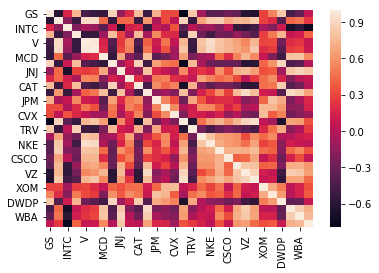

In [58]:
sns.heatmap(df_corr)

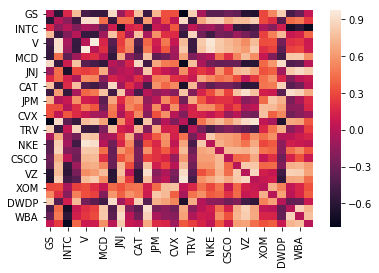

In [59]:
df1=df_corr.replace(1,0)
sns.heatmap(df1)

In [60]:
df2=(abs(df1)>0.8).astype(int)
df2


,GS,UNH,INTC,MMM,V,MSFT,MCD,IBM,JNJ,BA,...,CSCO,DIS,VZ,PFE,XOM,UTX,DWDP,PG,WBA,WMT
GS,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
UNH,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
INTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MMM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MSFT,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
IBM,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
JNJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Yana\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


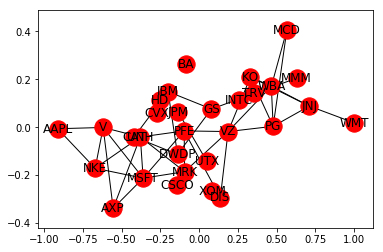

In [61]:
m=df2.values
n=ticker_dji
G=nx.from_numpy_matrix(m)
nodes=dict(zip(G.nodes(),n))
G1=nx.relabel_nodes(G, nodes)
nx.draw_networkx(G1, pos= nx.kamada_kawai_layout(G1))

In [107]:
cliques=list(nx.find_cliques(G1))
sorted_cliques=sorted(cliques, key=len, reverse=True)
b=sorted_cliques[:len(max(cliques,key=len))]

In [108]:
a=list()
for i in b:
    a.append(DJI[DJI['Symbol'].isin(i)]['Company Name'].values)
a

[array(['UnitedHealth Group Incorporated', 'Microsoft Corporation',
        'Merck & Co., Inc.', 'Pfizer Inc.'], dtype=object),
 array(['UnitedHealth Group Incorporated', 'Visa Inc.',
        'Microsoft Corporation', 'NIKE, Inc.'], dtype=object),
 array(['UnitedHealth Group Incorporated', 'Visa Inc.',
        'Microsoft Corporation', 'American Express Company'], dtype=object),
 array(['The Coca-Cola Company', 'Verizon Communications Inc.',
        'The Procter & Gamble Company', 'Walgreens Boots Alliance, Inc.'],
       dtype=object)]